<a href="https://colab.research.google.com/github/aak29/aak29/blob/main/StockDates_Reverseorder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
#import the packages
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web

In [19]:
start = dt.datetime(2022,1,1)
end = dt.datetime(2022,12,31)

In [20]:
#Create a dataframe
df = web.DataReader('TSLA', 'stooq', start, end)

In [21]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2022-11-16,191.51,192.57,185.66,186.92,66567599
2022-11-15,195.88,200.82,192.06,194.42,91293785
2022-11-14,192.77,195.73,186.34,190.95,92226649
2022-11-11,186.00,196.52,182.59,195.97,114403575
2022-11-10,189.90,191.00,180.03,190.72,132703015
...,...,...,...,...,...
2022-01-07,360.12,360.31,336.67,342.32,84164748
2022-01-06,359.00,362.67,340.17,354.90,90336474
2022-01-05,382.22,390.11,360.34,362.71,80119797


In [22]:
df=df.reindex(index=df.index[::-1])
df

,Open,High,Low,Close,Volume
Date,,,,,
2022-01-03,382.58,400.36,378.68,399.93,104686047
2022-01-04,396.52,402.67,374.35,383.20,100248258
2022-01-05,382.22,390.11,360.34,362.71,80119797
2022-01-06,359.00,362.67,340.17,354.90,90336474
2022-01-07,360.12,360.31,336.67,342.32,84164748
...,...,...,...,...,...
2022-11-10,189.90,191.00,180.03,190.72,132703015
2022-11-11,186.00,196.52,182.59,195.97,114403575
2022-11-14,192.77,195.73,186.34,190.95,92226649


In [23]:
#Export to a csv
df.to_csv('tsla.csv')

In [24]:
#Reduce decimal places for easier viewing
pd.set_option("display.precision", 2)

In [25]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2022-01-03,382.58,400.36,378.68,399.93,104686047
2022-01-04,396.52,402.67,374.35,383.20,100248258
2022-01-05,382.22,390.11,360.34,362.71,80119797
2022-01-06,359.00,362.67,340.17,354.90,90336474
2022-01-07,360.12,360.31,336.67,342.32,84164748


In [26]:
df = pd.read_csv('tsla.csv', parse_dates=True, index_col=0)
df

,Open,High,Low,Close,Volume
Date,,,,,
2022-01-03,382.58,400.36,378.68,399.93,104686047
2022-01-04,396.52,402.67,374.35,383.20,100248258
2022-01-05,382.22,390.11,360.34,362.71,80119797
2022-01-06,359.00,362.67,340.17,354.90,90336474
2022-01-07,360.12,360.31,336.67,342.32,84164748
...,...,...,...,...,...
2022-11-10,189.90,191.00,180.03,190.72,132703015
2022-11-11,186.00,196.52,182.59,195.97,114403575
2022-11-14,192.77,195.73,186.34,190.95,92226649


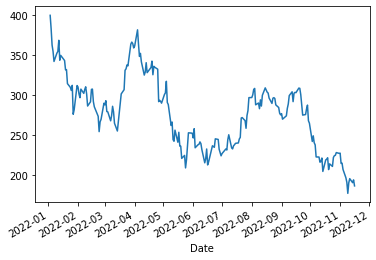

In [27]:
df['Close'].plot()
plt.show()


In [28]:
df['100ma'] = df['Close'].rolling(window=100, min_periods=0).mean()
df

,Open,High,Low,Close,Volume,100ma
Date,,,,,,
2022-01-03,382.58,400.36,378.68,399.93,104686047,399.93
2022-01-04,396.52,402.67,374.35,383.20,100248258,391.56
2022-01-05,382.22,390.11,360.34,362.71,80119797,381.94
2022-01-06,359.00,362.67,340.17,354.90,90336474,375.18
2022-01-07,360.12,360.31,336.67,342.32,84164748,368.61
...,...,...,...,...,...,...
2022-11-10,189.90,191.00,180.03,190.72,132703015,258.43
2022-11-11,186.00,196.52,182.59,195.97,114403575,258.03
2022-11-14,192.77,195.73,186.34,190.95,92226649,257.59


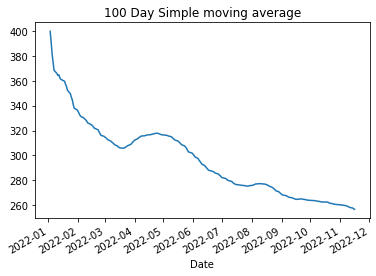

In [29]:
df['100ma'].plot()
plt.title('100 Day Simple moving average');

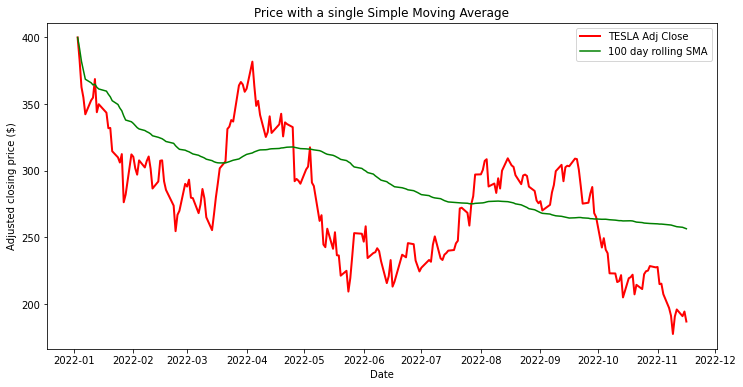

In [30]:
#The size for our chart:
plt.figure(figsize = (12,6))
#Plotting Close and SMA lines:
plt.plot(df['Close'], 'r', label='TESLA Adj Close', linewidth = 2)
plt.plot(df['100ma'],'g', label='100 day rolling SMA', linewidth = 1.5)

#Adding title and labels on the axes, making legend visible:
plt.xlabel('Date')
plt.ylabel('Adjusted closing price ($)')
plt.title('Price with a single Simple Moving Average')
plt.legend();


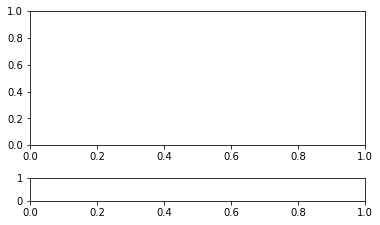

In [31]:
ax1= plt.subplot2grid((8,1), (0,0), rowspan = 5, colspan =1) 
ax2= plt.subplot2grid((8,1), (6,0), rowspan = 1, colspan =1) 

In [32]:
ax1.plot(df.index, df['Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])



<BarContainer object of 221 artists>

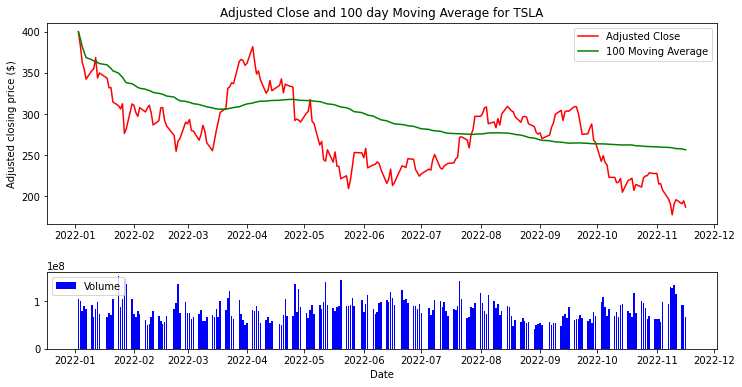

In [33]:
#The size for our chart:
plt.figure(figsize = (12,6))
#Plotting Adj Close and SMA lines:
ax1 = plt.subplot2grid((8,1),(0,0),rowspan=5,colspan=1)
ax2 = plt.subplot2grid((8,1),(6,0),rowspan=3,colspan=1, sharex=ax1)

ax1.plot(df.index,df['Close'], 'r',label='Adjusted Close')
ax1.plot(df.index,df['100ma'], 'g', label= "100 Moving Average")
plt.xlabel('Date')
#ax1.set_xlabel('Date')
ax1.set_ylabel('Adjusted closing price ($)')
ax1.set_title('Adjusted Close and 100 day Moving Average for TSLA')
ax1.legend()

ax2.bar(df.index,df['Volume'], label = "Volume", color='b')
ax2.legend()

plt.show()
